(3144, 3)
(3144,)
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 16)                64        
                                                                 
 dense_106 (Dense)           (None, 16)                272       
                                                                 
 dense_107 (Dense)           (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100000
503/503 [==============================] - 1s 571us/step - loss: 14.7870 - accuracy: 0.5097 - val_loss: 0.1836 - val_accuracy: 1.0000
Epoch 2/100000
503/503 [==============================] - 0s 377us/step - loss: 2.9729 - accuracy: 0.5296 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoc

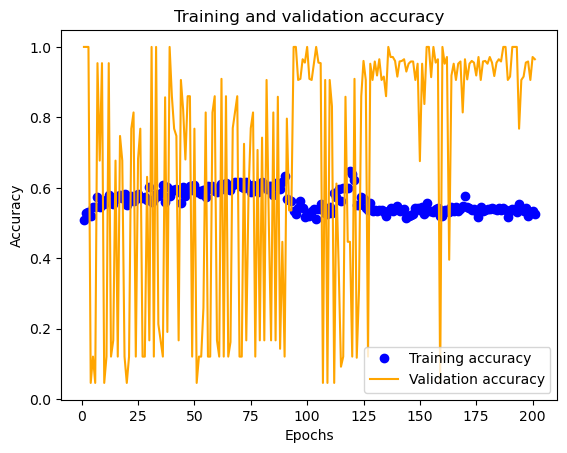

In [48]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

df = pd.read_csv("./banjir_filtered.txt", sep="\t")

# split into X and Y
Y = df['banjir']
X = df.drop(['banjir'], axis=1)

print(X.shape)
print(Y.shape)

# convert to numpy arrays
X = np.array(X)

# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=200,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=100000, # you can set this to a big number!
                    batch_size=5,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

# save the model
model.save('banjir_model_2.h5')

In [60]:
# load model
from keras.models import load_model
model = load_model('banjir_model_2.h5')

# predict from csv
df = pd.read_csv("./banjir_test.txt", sep="\t")
X = df.drop(['banjir'], axis=1)
X = np.array(X)
preds = np.round(model.predict(X),0)

# compare df['banjir'] with preds
df['preds'] = preds

# check accuracy
df['banjir'] = df['banjir'].astype(int)
df['preds'] = df['preds'].astype(int)
df['correct'] = df['banjir'] == df['preds']
# accuracy
print (df['correct'].sum() / len(df));

# save to csv
df.to_csv('banjir_pred.txt', index=False, sep='\t')

259/259 [==============================] - 0s 252us/step
0.8914016205103398
